<a href="https://colab.research.google.com/github/weiling0325/Schizophrenia-Detection-Using-Microbiome-Data/blob/main/Pre_Compute_Causal_Effect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import pickle

# Load the saved model with the selected features
save_path = '/content/drive/MyDrive/FYP_Model/best_PyImpetus_random_forest_model.pkl'

with open(save_path, 'rb') as file:
  data = pickle.load(file)

rf_model = data['model']
selected_features = data['selected_features']
print("Model and selected features loaded successfully.")

print("Number of features selected:", len(selected_features))
print("Markov Blanket:", selected_features)

Model and selected features loaded successfully.
Number of features selected: 54
Markov Blanket: ['d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella', 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Alloprevotella', 'd__Bacteria;p__Desulfobacterota;c__Desulfovibrionia;o__Desulfovibrionales;f__Desulfovibrionaceae;g__Desulfovibrio', 'd__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Blautia', 'd__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae;g__Bifidobacterium', 'age', 'd__Bacteria;p__Firmicutes;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus', 'd__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelatoclostridiaceae;g__Catenibacterium', 'd__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__Flavonifractor', 'd__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Leuconostocaceae;g

In [ ]:
# Load the dataset
dataset_path = '/content/drive/MyDrive/Dataset/preprocessed_data.csv'
df = pd.read_csv(dataset_path)

# Extract the dataset with selected microbiome features (exclude 'age') and the target variable
selected_bacteria_features_columns = [col for col in selected_columns if col != 'age']
print(selected_bacteria_features_columns)
print(len(selected_bacteria_features_columns))
df_selected_bacteria_with_diagnosis = df[selected_bacteria_features_columns + ['diagnosis']]


['d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella', 'd__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Alloprevotella', 'd__Bacteria;p__Desulfobacterota;c__Desulfovibrionia;o__Desulfovibrionales;f__Desulfovibrionaceae;g__Desulfovibrio', 'd__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Blautia', 'd__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Bifidobacteriales;f__Bifidobacteriaceae;g__Bifidobacterium', 'd__Bacteria;p__Firmicutes;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus', 'd__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelatoclostridiaceae;g__Catenibacterium', 'd__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__Flavonifractor', 'd__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Leuconostocaceae;g__Weissella', 'd__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Faecalib

In [ ]:
df_selected_bacteria_with_diagnosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 54 columns):
 #   Column                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                 --------------  -----  
 0   d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella                                            161 non-null    float64
 1   d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Alloprevotella                                        161 non-null    float64
 2   d__Bacteria;p__Desulfobacterota;c__Desulfovibrionia;o__Desulfovibrionales;f__Desulfovibrionaceae;g__Desulfovibrio                      161 non-null    float64
 3   d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospi

In [ ]:
pip install dowhy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.2 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.11
    Uninstalling Cython-3.0.11:
      Successfully uninstalled Cython-3.0.11


In [ ]:
from dowhy import CausalModel

# Define the target outcome variable
outcome = 'diagnosis'

# List all bacteria features
bacteria_features = [col for col in df_selected_bacteria_with_diagnosis.columns if col not in [outcome]]

# Store the causal effect results for each bacteria feature
causal_effects = []

# Iterate through each bacteria feature to calculate its causal effect on 'diagnosis'
for bacteria in bacteria_features:
    print(f"Calculating causal effect for: {bacteria}")

    # Initialize the causal model
    model = CausalModel(
        data=df_selected_bacteria_with_diagnosis,
        treatment=bacteria,
        outcome=outcome
    )

    # Identify the causal effect
    identified_estimand = model.identify_effect()

    estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

    # Append the result to the causal_effects list
    causal_effects.append({
        'Bacteria': bacteria,
        'Causal Effect': estimate.value
    })

    print(f"Causal effect of {bacteria} on {outcome}: {estimate.value}\n")

# Convert the causal effects list to a DataFrame and sort by effect size
causal_effects_df = pd.DataFrame(causal_effects).sort_values(by='Causal Effect', ascending=False)
print(causal_effects_df)

causal_effects_df_path = '/content/drive/MyDrive/Dataset/precompute_causal_effects_bacteria_diagnosis.csv'
causal_effects_df.to_csv(causal_effects_df_path, index=False)

/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

Calculating causal effect for: d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella
Causal effect of d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Prevotella on diagnosis: 0.9932677798163457

Calculating causal effect for: d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Alloprevotella
Causal effect of d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;g__Alloprevotella on diagnosis: 19.021844551247828

Calculating causal effect for: d__Bacteria;p__Desulfobacterota;c__Desulfovibrionia;o__Desulfovibrionales;f__Desulfovibrionaceae;g__Desulfovibrio
Causal effect of d__Bacteria;p__Desulfobacterota;c__Desulfovibrionia;o__Desulfovibrionales;f__Desulfovibrionaceae;g__Desulfovibrio on diagnosis: 52.48866782966657

Calculating causal effect for: d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Blautia
Causal effect of d__Bacteria;p__

/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

Causal effect of d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelatoclostridiaceae;g__Catenibacterium on diagnosis: 3.4623774847231297

Calculating causal effect for: d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__Flavonifractor
Causal effect of d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__Flavonifractor on diagnosis: -100.41393828815839

Calculating causal effect for: d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Leuconostocaceae;g__Weissella
Causal effect of d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Leuconostocaceae;g__Weissella on diagnosis: -3.2037696619164224

Calculating causal effect for: d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Faecalibacterium
Causal effect of d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Faecalibacterium on diagnosis: -2.1494719910507785

Calculating causal effect

/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

Causal effect of d__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Clostridiaceae;g__Sarcina on diagnosis: 27.548971835857827

Calculating causal effect for: d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelatoclostridiaceae;g__Candidatus_Stoquefichus
Causal effect of d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelatoclostridiaceae;g__Candidatus_Stoquefichus on diagnosis: -593.6918097861296

Calculating causal effect for: d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__[Eubacterium]_ventriosum_group
Causal effect of d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__[Eubacterium]_ventriosum_group on diagnosis: -57.02789861687755

Calculating causal effect for: d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Oxalobacteraceae;__
Causal effect of d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Oxalobacteraceae;__ on diagno

/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

Causal effect of d__Bacteria;p__Actinobacteriota;c__Actinobacteria;o__Corynebacteriales;f__Corynebacteriaceae;g__Corynebacterium on diagnosis: 10.197191217597787

Calculating causal effect for: d__Bacteria;p__Firmicutes;c__Clostridia;o__Peptostreptococcales-Tissierellales;f__Peptostreptococcales-Tissierellales;g__Anaerococcus
Causal effect of d__Bacteria;p__Firmicutes;c__Clostridia;o__Peptostreptococcales-Tissierellales;f__Peptostreptococcales-Tissierellales;g__Anaerococcus on diagnosis: 617.0028780883422

Calculating causal effect for: d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus
Causal effect of d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus on diagnosis: 0.4595303448361816

Calculating causal effect for: d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Sutterellaceae;g__Parasutterella
Causal effect of d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkhold

/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

Causal effect of d__Bacteria;p__Desulfobacterota;c__Desulfovibrionia;o__Desulfovibrionales;f__Desulfovibrionaceae;g__Bilophila on diagnosis: -50.23832003606189

Calculating causal effect for: d__Bacteria;__;__;__;__;__
Causal effect of d__Bacteria;__;__;__;__;__ on diagnosis: 19.154625012667356

Calculating causal effect for: d__Bacteria;p__Firmicutes;c__Clostridia;o__Christensenellales;f__Christensenellaceae;g__Christensenellaceae_R-7_group
Causal effect of d__Bacteria;p__Firmicutes;c__Clostridia;o__Christensenellales;f__Christensenellaceae;g__Christensenellaceae_R-7_group on diagnosis: 10.99990484624397

Calculating causal effect for: d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__UCG-002
Causal effect of d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__UCG-002 on diagnosis: 15.469365356718093

Calculating causal effect for: d__Bacteria;p__Firmicutes;c__Clostridia;o__Christensenellales;f__Christensenellaceae;__
Causa

/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

Causal effect of d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Atopobiaceae;g__Olsenella on diagnosis: 49.39249629751494

Calculating causal effect for: d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas
Causal effect of d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas on diagnosis: 1.4415470370968344

Calculating causal effect for: d__Bacteria;p__Firmicutes;c__Clostridia;o__Peptostreptococcales-Tissierellales;__;__
Causal effect of d__Bacteria;p__Firmicutes;c__Clostridia;o__Peptostreptococcales-Tissierellales;__;__ on diagnosis: 74.29691761066533

Calculating causal effect for: d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Hungatella
Causal effect of d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Hungatella on diagnosis: 43.342083947163395

Calculating causal effect for: d__Bacter

/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

Causal effect of d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Ruminococcaceae;g__Negativibacillus on diagnosis: -1.3660847419156776

Calculating causal effect for: d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;__;__
Causal effect of d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;__;__ on diagnosis: 75.63086124553749

Calculating causal effect for: d__Bacteria;p__Firmicutes;__;__;__;__
Causal effect of d__Bacteria;p__Firmicutes;__;__;__;__ on diagnosis: 27.747824850877905

Calculating causal effect for: d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Atopobiaceae;g__Coriobacteriaceae_UCG-003
Causal effect of d__Bacteria;p__Actinobacteriota;c__Coriobacteriia;o__Coriobacteriales;f__Atopobiaceae;g__Coriobacteriaceae_UCG-003 on diagnosis: 6.837697935664278

Calculating causal effect for: d__Bacteria;p__Firmicutes;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Sellimonas
Causal effect of d__Bacteria;p__Firmicutes;c__Cl

/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

Causal effect of d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae;g__Dielma on diagnosis: -187.868945318874

Calculating causal effect for: d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae;g__[Clostridium]_innocuum_group
Causal effect of d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae;g__[Clostridium]_innocuum_group on diagnosis: 26.036107494444817

Calculating causal effect for: d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;__;__
Causal effect of d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;__;__ on diagnosis: 43.58701497293105

Calculating causal effect for: d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae;g__Turicibacter
Causal effect of d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae;g__Turicibacter on diagnosis: 12.992072139517031

Calculating causal effect for: d__Bacteria;p__Verrucomicrobiota;c

/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

Causal effect of d__Bacteria;p__Firmicutes;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;__ on diagnosis: 10.970596651506204

Calculating causal effect for: d__Bacteria;p__Synergistota;c__Synergistia;o__Synergistales;f__Synergistaceae;g__Cloacibacillus
Causal effect of d__Bacteria;p__Synergistota;c__Synergistia;o__Synergistales;f__Synergistaceae;g__Cloacibacillus on diagnosis: 7.948027530282757

Calculating causal effect for: d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;__
Causal effect of d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Prevotellaceae;__ on diagnosis: 26.54117260239191

Calculating causal effect for: d__Bacteria;p__Desulfobacterota;c__Desulfovibrionia;o__Desulfovibrionales;f__Desulfovibrionaceae;g__uncultured
Causal effect of d__Bacteria;p__Desulfobacterota;c__Desulfovibrionia;o__Desulfovibrionales;f__Desulfovibrionaceae;g__uncultured on diagnosis: 556.3927761272231

Calculating causal effect for: d__Bacteria;p__Fi

/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:131: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

Causal effect of d__Bacteria;p__Firmicutes;c__Bacilli;o__Erysipelotrichales;f__Erysipelotrichaceae;g__Solobacterium on diagnosis: 91.86000758084793

Calculating causal effect for: d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides
Causal effect of d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides on diagnosis: -1.2640987314070589

Calculating causal effect for: d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus
Causal effect of d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Streptococcaceae;g__Streptococcus on diagnosis: -1.8327920315622772

                                             Bacteria  Causal Effect
20  d__Bacteria;p__Firmicutes;c__Clostridia;o__Pep...     617.002878
48  d__Bacteria;p__Desulfobacterota;c__Desulfovibr...     556.392776
16  d__Bacteria;p__Proteobacteria;c__Gammaproteoba...     521.427312
49  d__Bacteria;p__Firmicutes;c__Clos

<ipython-input-17-9b31e5d3adbe>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


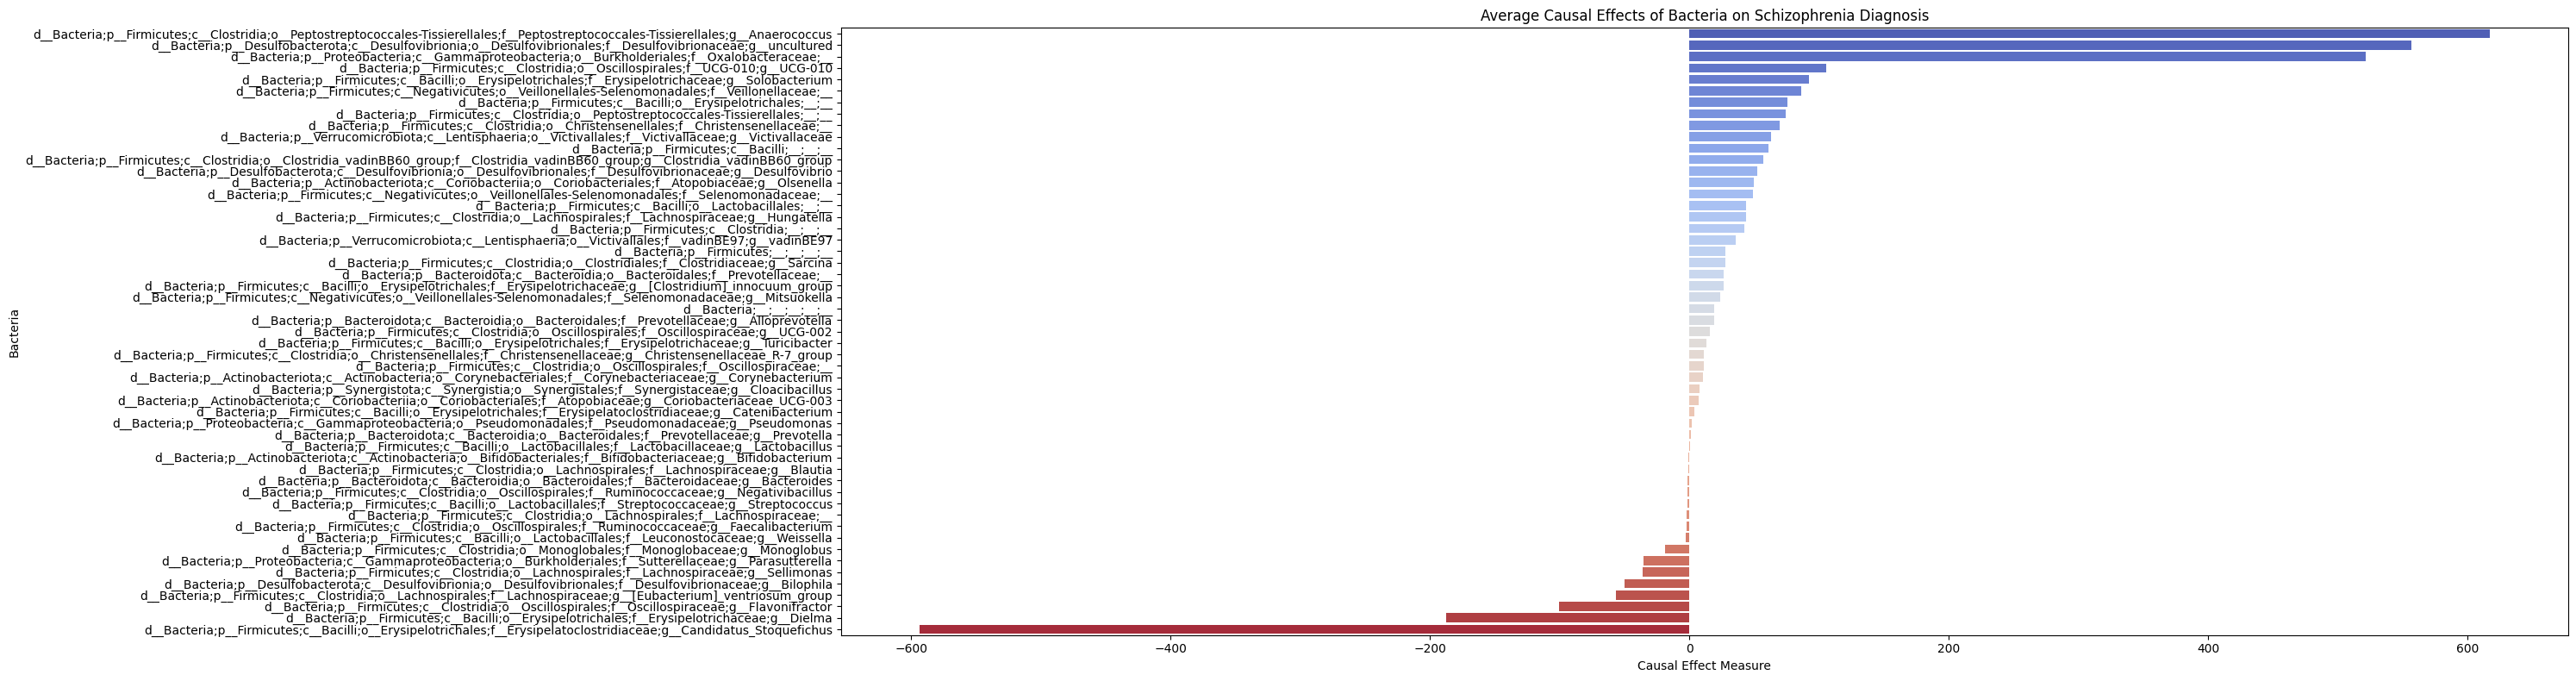

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot horizontal bar plot
plt.figure(figsize=(30, 8))
sns.barplot(
    data=causal_effects_df,
    x='Causal Effect',
    y='Bacteria',
    palette="coolwarm"
)

# Add labels and title
plt.xlabel('Causal Effect Measure')
plt.ylabel('Bacteria')
plt.title('Average Causal Effects of Bacteria on Schizophrenia Diagnosis')

# Display the plot with a tight layout
plt.tight_layout()
plt.show()

In [ ]:
path = '/content/drive/MyDrive/Dataset/precompute_causal_effects_bacteria_diagnosis.csv'
precompute_causal_effect = pd.read_csv(path)
precompute_causal_effect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bacteria       53 non-null     object 
 1   Causal Effect  53 non-null     float64
dtypes: float64(1), object(1)
memory usage: 976.0+ bytes
